### 项目介绍：
    本案例的目标是客户价值识别，通过航空公司客户数据识别不同价值的客户。识别客户价值应用最广泛的模型是通过3个指标(最近消费时间间隔、消费频带和消费金额)来进行客户细分，识别出高价值的客户，简称REFM 。

    在RFM模型中，消费金额表示在一段时间内， 客户购买该企业产品金额的总和由于航空票价受到运输距离、舱位等级等多种因素影响，同样消费金额的不同旅名对航空公司的价值是不同的。例如，一位购买长航线、低等级舱位票的旅各与一位购买短航线、高等级验位票的旅客相比，后者对于航空公司而言价值可能更高。因此，这个指标并不适用于航空公司的客户价值分析151我们选择客户在一定时间内累积的飞行里程M和客户在一定时间内乘坐舱位所对应的折扣系数的平均值两个指标代替消费金额。此外，考虑航空公司会员人会时间的长短在定程度上能够影响客户价值，所以在模型中增加客户关系长度L.作烟区分客户的另一指标。

    本案例将客户 关系长度、消费时间间隔、消费频率、飞行里程和折扣系数的平均值五个指标作为航空公司识别客户价值指标


## 数据探索


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('air_data.csv')

In [4]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
MEMBER_NO                  62988 non-null int64
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59740 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64
LAST_FLIGHT_

In [8]:
describe_=df.describe().T #转置
describe_

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


In [14]:
describe_['null_sum']=len(df)-describe_['count']    #查看每列数据有多少空值 ，最大值，最小值
describe_=describe_[['null_sum','min','max']]
describe_columns=[u'空值数',u'最小值',u'最大值']
describe_

,null_sum,min,max
MEMBER_NO,0.0,1.00,62988.000000
FFP_TIER,0.0,4.00,6.000000
AGE,420.0,6.00,110.000000
FLIGHT_COUNT,0.0,2.00,213.000000
BP_SUM,0.0,0.00,505308.000000
EP_SUM_YR_1,0.0,0.00,0.000000
EP_SUM_YR_2,0.0,0.00,74460.000000
SUM_YR_1,551.0,0.00,239560.000000
SUM_YR_2,138.0,0.00,234188.000000
SEG_KM_SUM,0.0,368.00,580717.000000


## 数据预处理

###  *1.数据清洗*

 1）发现数据中存在缺失值，票价最小值为0、折扣率最小为0、总飞行公里数大于0的记录。
>处理方法：因这类数据比例很小，原始数据量大，对问题影响较小，因此进行丢弃处理。

In [16]:
df1=df.copy()

In [28]:
#去除总票价为零，或总飞行公里、平均折扣不为零的记录
index1=df1['SUM_YR_2']!=0           
index2=(df1['SEG_KM_SUM']==0)&(df1['avg_discount']==0)
df1=df1[index1|index2]

In [29]:
df1.count()

MEMBER_NO                  51176
FFP_DATE                   51176
FIRST_FLIGHT_DATE          51176
GENDER                     51174
FFP_TIER                   51176
WORK_CITY                  49351
WORK_PROVINCE              48641
WORK_COUNTRY               51155
AGE                        50844
LOAD_TIME                  51176
FLIGHT_COUNT               51176
BP_SUM                     51176
EP_SUM_YR_1                51176
EP_SUM_YR_2                51176
SUM_YR_1                   51176
SUM_YR_2                   51038
SEG_KM_SUM                 51176
WEIGHTED_SEG_KM            51176
LAST_FLIGHT_DATE           51176
AVG_FLIGHT_COUNT           51176
AVG_BP_SUM                 51176
BEGIN_TO_FIRST             51176
LAST_TO_END                51176
AVG_INTERVAL               51176
MAX_INTERVAL               51176
ADD_POINTS_SUM_YR_1        51176
ADD_POINTS_SUM_YR_2        51176
EXCHANGE_COUNT             51176
avg_discount               51176
P1Y_Flight_Count           51176
L1Y_Flight

###  *2. 属性规约*

>原始数据中属性列太多，又有冗余、无用、重复的数据，所以只选取与模型相关的六个模型特征

In [48]:
df2=df1[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df2.columns=[u'截止时间',u'入会时间',u'上一飞行距今',u'飞行总计',u'飞行总里程',u'平均折扣率']
df2.head()

,截止时间,入会时间,上一飞行距今,飞行总计,飞行总里程,平均折扣率
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658


### *3. 数据变换*

>1） 还考虑到客户的入会时间长短会影响客户的价值

In [67]:
#计算加入会员时间长短，得要转变数据类型
type(df2[u'截止时间'])
df2[u'截止时间']=pd.to_datetime(df2[u'截止时间'])
df2[u'入会时间']=pd.to_datetime(df2[u'入会时间'])
df2[u'入会时长']=df2[u'截止时间']-df2[u'入会时间']
df2.drop([u'截止时间',u'入会时间'],axis=1,inplace=True)

D:\anaconda_install\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda_install\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\anaconda_install\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [68]:
df2.head()

,上一飞行距今,飞行总计,飞行总里程,平均折扣率,入会时长
0,1,210,580717,0.961639,2706 days
1,7,140,293678,1.252314,2597 days
2,11,135,283712,1.254676,2615 days
3,97,23,281336,1.090870,2047 days
4,5,152,309928,0.970658,1816 days


> 2)数据五个指标的取值范围数据差异很大，为消除数量级带来的影响，需对数据标准化处理

In [72]:
df3=(df2-df2.mean(axis=0))/df2.std(axis=0)  #形成df3建模数据集

## 模型构建

>根据客户的五个指标，对客户进行聚类分群,分群数k=5(视情况而定)

In [74]:
from sklearn.cluster import KMeans

In [111]:
k=5
kmodel=KMeans(n_clusters=k,n_jobs=4) #模型初始化 ，n_clusters为分类数，n_job为并行数，一般为CPU数
kmodel.fit(df3)

kmodel.cluster_centers_,kmodel.labels_

(array([[-0.08827369, -0.05046849, -0.03593286,  2.87182378,  0.1950162 ],
        [-0.47444552, -0.16910915, -0.17139912, -0.20388248, -0.71247157],
        [ 1.49949637, -0.53173107, -0.49751794, -0.19172015, -0.34805382],
        [-0.81304163,  2.36082006,  2.29279437,  0.27654893,  0.4621158 ],
        [-0.30521213, -0.12879004, -0.13323368, -0.1192214 ,  1.13152238]]),
 array([3, 3, 3, ..., 4, 4, 2]))

In [120]:
r1=pd.Series(kmodel.labels_).value_counts()
r2=pd.DataFrame(kmodel.cluster_centers_)
df4=pd.concat([r1,r2],axis=1)
df4.columns=[u'聚类个数'] + list(df2.columns)
df4.head()

,聚类个数,上一飞行距今,飞行总计,飞行总里程,平均折扣率,入会时长
0,2233,-0.088274,-0.050468,-0.035933,2.871824,0.195016
1,19287,-0.474446,-0.169109,-0.171399,-0.203882,-0.712472
2,11534,1.499496,-0.531731,-0.497518,-0.191720,-0.348054
3,4757,-0.813042,2.360820,2.292794,0.276549,0.462116
4,13365,-0.305212,-0.128790,-0.133234,-0.119221,1.131522


## 特征分析
### *用雷达图进行表示*

In [121]:
import matplotlib.pyplot as plt

In [123]:
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']='simkai' 
plt.rcParams['axes.unicode_minus']=False
#标签
labels=np.array(df2.columns)
#数据个数
dataLength=5

D:\anaconda_install\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda_install\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


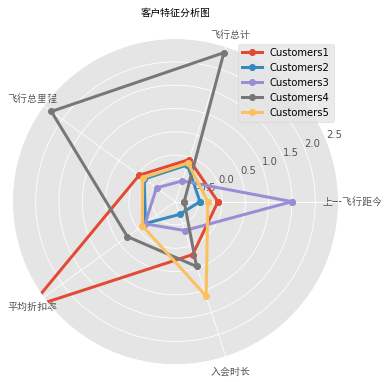

In [127]:
N=len(r2)
angles=np.linspace(0,2*np.pi,N,endpoint=False)
#使雷达图封闭
data=pd.concat([r2,r2.ix[:,0]],axis=1)
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,polar=True)

for i in range(0,5):
    j=i+1
    ax.plot(angles,data.ix[i,:],'o-',linewidth=3,label="Customers{0}".format(j))

ax.set_thetagrids(angles*180/np.pi,labels,fontproperties='SimHei')       #每个特征对应的标签
ax.set_title("客户特征分析图",va='bottom',fontproperties='SimHei') #标题
ax.set_rlim(-1,2.5)
ax.grid(True)
plt.legend()
plt.show()

### *价值分析*

Customer 1： 在'平均折扣率'属性上最大，可定义为重要发展客户  
Customer 2： 在'飞行总计' '飞行总里程'属性上较小，定义为一般客户  
Customer 3： 在'飞行总计' '飞行总里程'属性最小，定义为低价值客户  
Customer 4： 在'飞行总计' '飞行总里程'属性最大，定义为重要保持客户  
Customer 5： 在'入会时长'属性最大，定义为重要挽留客户  

### 特征

每种客户类别的特征如下：  
1.重要保持客户：'平均折扣率'（平均折扣率较高、仓位等级较高）、'飞行总计'、'飞行总里程'较高，'上一次飞行距今'（最近乘坐航班）低。应将资源优先投放到这类客户身上，进行差异化管理，提高客户的忠诚度和满意度。  

2.重要发展客户：'平均折扣率'较高，这类客户入会时长短、当前价值低、发展潜力大，应促使客户增加在本公司和合作伙伴处的消费。  
3.重要挽留客户：'平均折扣率'、'飞行总计'、'飞行总里程'较高，客户价值变化的不确定性高。应掌握客户最新信息、维持与客户的互动。  
4.一般和低价值客户：其他属性都低、'上一次飞行距今'较高。这类客户可能在打折促销时才会选择消费。
